In [50]:
from numpy import pi,exp,array,arange,sqrt,sin ,cos,real,dot,linalg,eye,transpose,diag,shape,asarray,zeros,imag
import kwant
import numpy as np
from matplotlib.pyplot import ylim,hist
import matplotlib.pyplot
from matplotlib import pyplot
from random import shuffle
%matplotlib inline
import tinyarray
import seaborn

sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [51]:
def make_sys(t=1,a=1,L=10):        
         
    def Potential(site,params):           
           return params['v']*sigma_0

    def Hoppings(site1,site2,params):         
        return -t * sigma_0 - 1j * params['alpha'] * sigma_y
    
    lat = kwant.lattice.square(a)
    sys = kwant.Builder()
    sys[(lat(x,0) for x in range(L))] = Potential
    sys[kwant.builder.HoppingKind((1, 0), lat, lat)] = Hoppings

    InterfaceSites =[lat(0,0)]    
    return sys,InterfaceSites

In [52]:
#this function mounts a fictitious lead with self energy zero
def mount_vlead(sys, vlead_interface, norb=1):
    """Mounts virtual lead to interfaces provided.
 
    :sys: kwant.builder.Builder
        An unfinalized system to mount leads
    :vlead_interface: sequence of kwant.builder.Site
        Interface of lead
    :norb: integer
        Number of orbitals in system hamiltonian.
    """
    dim = len(vlead_interface)*norb
    zero_array = zeros((dim, dim), dtype=float)
    def selfenergy_func(energy,arg=()):
         return zero_array

    vlead = kwant.builder.SelfEnergyLead(selfenergy_func, vlead_interface)
    sys.leads.append(vlead)

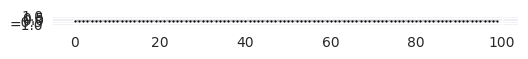

In [53]:
sys,InterfaceSites=make_sys(L=100)
kwant.plot(sys)
pyplot.show('False')

In [54]:
#add  a fictitious lead to the sites defined in the list InterFaceSite 
mount_vlead(sys,InterfaceSites,norb=2)
sys=sys.finalized()

In [76]:
MyList=[]
G_mat=zeros((2,2),float)
X1,X2=[],[]
energy=-1.8#-3.65
for i in range(-4000,4001):      
       
       params=dict(v=i*0.00003,alpha=0.05)       
       GreenFunction=kwant.greens_function(sys,energy=energy,args=[params],out_leads=[0], in_leads=[0]).data      
       X1.append(GreenFunction[1][1].real) 
       X2.append(GreenFunction[0][0].real)

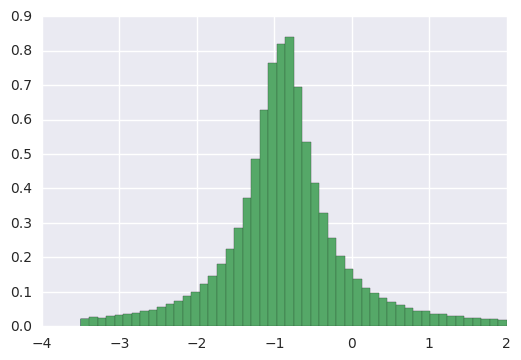

In [74]:
Y0,X0,T0= pyplot.hist(X1,bins=50,range=(-3.5,2),normed=True,linewidth=0.11)
Y0,X0,T0= pyplot.hist(X2,bins=50,range=(-3.5,2),normed=True,linewidth=0.11)

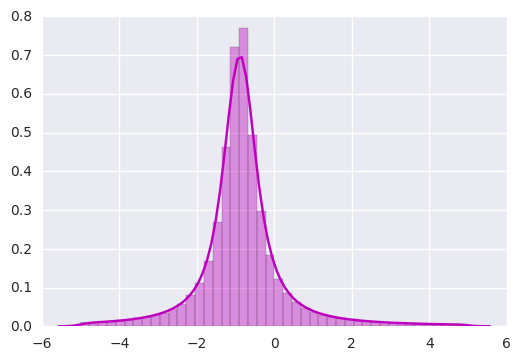

In [77]:
bins = np.linspace(-5, 5, 45)
Xbis=[x for x in X1 if -5<x<5]
seaborn.distplot(Xbis, color="m",bins=bins)

In [81]:
from scipy.optimize import curve_fit
def Lorentz(x,a,c):
    return 1/pi*a/(a**2+(x-c)**2)

xdata=[i*0.00006 for i in range(-4000,4001)]
popt, pcov = curve_fit(Lorentz,X0[1:],Y0,bounds=([0,-2], [3., 2.]))
popt2, pcov = curve_fit(Lorentz,X0[:len(Y0)],Y0,bounds=([0,-2], [3., 2.]))

NameError: name 'popt2' is not defined

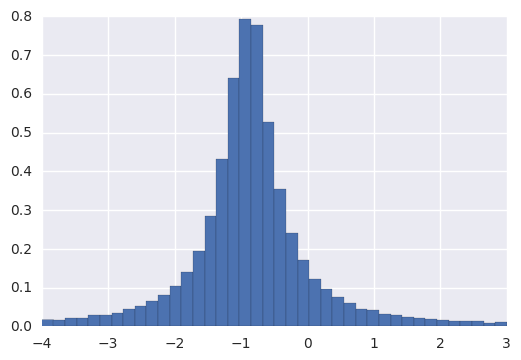

In [80]:
X_fit=[-4+i*8/200. for i in range(200)]
Y_fit=[Lorentz(x,*popt) for x in X_fit]
Y0,X0,T0= pyplot.hist(X1,bins=40,range=(-4,3),normed=True,linewidth=0.11)
Y2_fit=[Lorentz(x,*popt2) for x in X_fit]
pyplot.plot(X_fit,Y_fit)
#pyplot.plot(X0[:len(X0)-1],Y0)